# Week 4 Logistic Regression

1. Why logistic regression is better than linear regression for classifcation

2. The application of logistic regression model on IRIS dataset

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()

from sklearn.metrics import mean_squared_error, r2_score

In [85]:
x =  np.linspace(1.0, 4.8, 20)
y = np.concatenate([np.zeros(10), np.ones(10)])

In [86]:
x

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

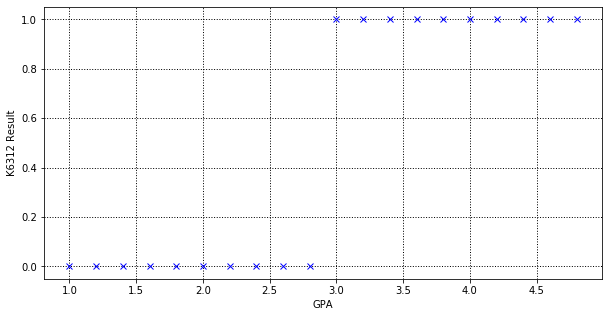

In [87]:
fig = plt.figure(figsize=(10,5))
xlabel = 'GPA'
ylabel = 'K6312 Result'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
_ = plt.plot(x, y, 'xb')

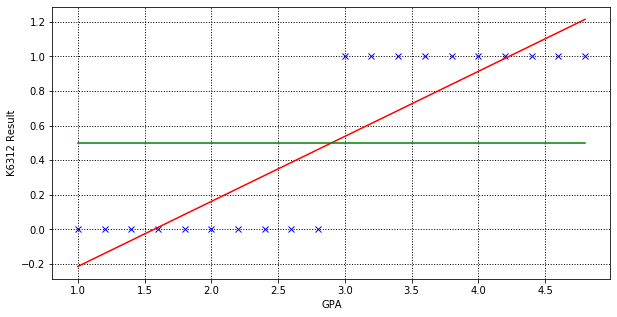

In [88]:
_ = lin_regression.fit(pd.DataFrame(x), y)

lin_y_pred_1 = lin_regression.predict(pd.DataFrame(x))

line_point_5 = x * 0 + .5

fig = plt.figure(figsize=(10,5))
xlabel = 'GPA'
ylabel = 'K6312 Result'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(x, y, 'xb')
plt.plot(x, lin_y_pred_1, '-r')
_ = plt.plot(x, line_point_5,'-g')

In [89]:
print(lin_regression.coef_)
print(lin_regression.intercept_)

[0.37593985]
-0.5902255639097744


In [90]:
test_x =  np.linspace(2.0, 5, 10)
print(test_x)
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
test_y_pred

[2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.         4.33333333 4.66666667 5.        ]


array([0.16165414, 0.28696742, 0.4122807 , 0.53759398, 0.66290727,
       0.78822055, 0.91353383, 1.03884712, 1.1641604 , 1.28947368])

In [91]:
new_x = np.append(x, np.linspace(6, 7, 20))
new_y = np.append(y, np.ones(20))

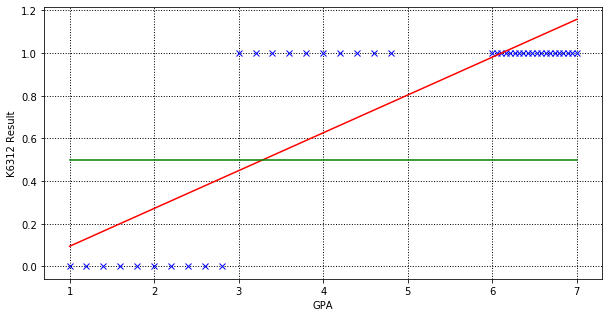

In [92]:
_ = lin_regression.fit(pd.DataFrame(new_x), new_y)

lin_y_pred_2 = lin_regression.predict(pd.DataFrame(new_x))

line_point_5 = new_x * 0 + .5

fig = plt.figure(figsize=(10,5))
xlabel = 'GPA'
ylabel = 'K6312 Result'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(new_x, new_y, 'xb')
plt.plot(new_x, lin_y_pred_2, '-r')
_ = plt.plot(new_x, line_point_5,'-g')

In [93]:
test_x =  np.linspace(3.0, 3.5, 10)
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
test_y_pred

array([0.44881444, 0.45865711, 0.46849977, 0.47834244, 0.4881851 ,
       0.49802777, 0.50787043, 0.5177131 , 0.52755576, 0.53739843])

In [94]:
y.shape

(20,)

In [95]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(solver='lbfgs')

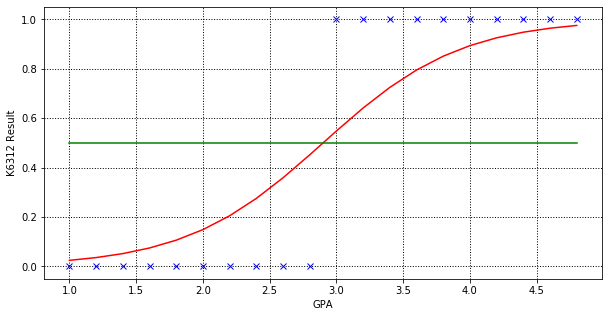

In [96]:
_ = log_regression.fit(pd.DataFrame(x), y)
line_point_5 = x * 0 + .5
y_pred = log_regression.predict_proba(pd.DataFrame(x))
log_y_pred_1 = [item[1] for item in y_pred]

fig = plt.figure(figsize=(10,5))
xlabel = 'GPA'
ylabel = 'K6312 Result'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(x, y, 'xb')
plt.plot(x, log_y_pred_1, '-r')
_ = plt.plot(x, line_point_5,'-g')

In [97]:
print(log_regression.coef_)
print(log_regression.intercept_)

[[1.93582432]]
[-5.61388646]


In [98]:
test_x =  np.array([5, 4.6, 1.2])
y_pred_test = log_regression.predict_proba(pd.DataFrame(test_x))
print(y_pred_test)

[[0.01686949 0.98313051]
 [0.03588451 0.96411549]
 [0.96411521 0.03588479]]


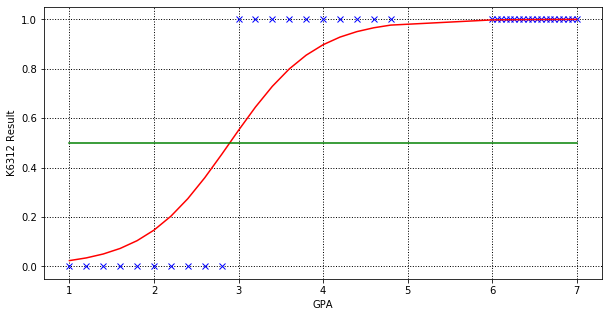

In [99]:
_ = log_regression.fit(pd.DataFrame(new_x), new_y)

y_pred = log_regression.predict_proba(pd.DataFrame(new_x))
log_y_pred_2 = [item[1] for item in y_pred]
line_point_5 = new_x * 0 + .5
fig = plt.figure(figsize=(10,5))
xlabel = 'GPA'
ylabel = 'K6312 Result'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.plot(new_x, new_y, 'xb')
plt.plot(new_x, log_y_pred_2, '-r')
_ = plt.plot(new_x, line_point_5,'-g')

In [100]:
test_y_pred = log_regression.predict_proba(pd.DataFrame(test_x))
test_y_pred

array([[0.01582493, 0.98417507],
       [0.03405721, 0.96594279],
       [0.96540197, 0.03459803]])

In [101]:
np.log(0.1)

-2.3025850929940455

#### Part 2: A Simple Logistic Regression Application - the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.

<img src="imgs/iris_setosa.jpg" width="30%" />

**Iris Setosa**

<img src="imgs/iris_versicolor.jpg" width="30%" />

**Iris Versicolor**

<img src="imgs/iris_virginica.jpg" width="30%" />

**Iris Virginica**

##### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

#### Here, we only try to predict the first two classes using logistic regression, since it is only for binary classification problem

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()

In [29]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [31]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [32]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [74]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [75]:
X, y = iris.data[:100], iris.target[:100]
# create the model

In [76]:
_ = log_regression.fit(X, y)
y_pred = log_regression.predict(X)

In [77]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [81]:
accuracy_score(y, y_pred)

1.0

In [82]:
precision_score(y, y_pred)

1.0

In [83]:
recall_score(y, y_pred)

1.0

In [102]:
%matplotlib inline

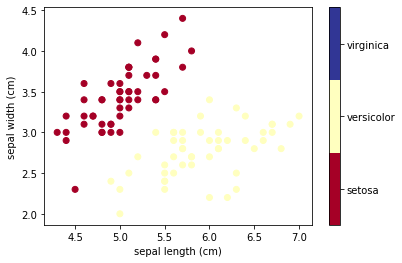

In [105]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:100, x_index], iris.data[:100, y_index],
            c=iris.target[:100], cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);